In [1]:
import glob
import pickle
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
from datetime import datetime, timedelta
from os.path import exists, join
import matplotlib.pyplot as plt

import match_ids


In [2]:
tor_path = "/glade/p/cisl/aiml/jtti_tornado/gridrad_storm_tracks/"
save_path = "/glade/scratch/ggantos/tornado_jtti/"
save_path = "/glade/p/cisl/aiml/jtti_tornado/gridrad_radar_zarr"


In [5]:
all_dates = match_ids.get_all_pickle_dates(tor_path)
print(f"First ten dates in data: {all_dates[:10]}")


Years in data: ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
First ten dates in data: ['20110108', '20110109', '20110125', '20110224', '20110225', '20110305', '20110318', '20110319', '20110329', '20110330']


In [6]:
# SAVE pickle files to geojson for 24 hour period (12Z to 12Z)

cols_drop = ['grid_point_latitudes_deg', 'grid_point_longitudes_deg', 'grid_point_rows', 'grid_point_columns', 'polygon_object_rowcol']

for date in all_dates[:1]:
    storm_poly = match_ids.load_track_day(tor_path, date)
    if storm_poly.size == 0:
        print(f"Dropping date: {date}")
        continue
    storm_poly = storm_poly.drop(cols_drop, axis=1)
    storm_poly = gpd.GeoDataFrame(storm_poly, geometry='polygon_object_latlng_deg')
#     storm_poly.to_file(join(save_path, f"storm_poly_{date}.geojson"), driver="GeoJSON")


Number of files for 20110108: 120


In [7]:
storm_poly.keys()

Index(['full_id_string', 'primary_id_string', 'secondary_id_string',
       'first_prev_secondary_id_string', 'second_prev_secondary_id_string',
       'first_next_secondary_id_string', 'second_next_secondary_id_string',
       'valid_time_unix_sec', 'spc_date_string',
       'tracking_start_time_unix_sec', 'tracking_end_time_unix_sec',
       'cell_start_time_unix_sec', 'cell_end_time_unix_sec', 'age_seconds',
       'centroid_latitude_deg', 'centroid_longitude_deg',
       'east_velocity_m_s01', 'north_velocity_m_s01',
       'polygon_object_latlng_deg', 'run_time_unix_sec'],
      dtype='object')

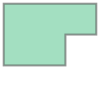

In [15]:
storm_poly['polygon_object_latlng_deg'][0]

In [14]:
storm_poly['polygon_object_latlng_deg'][0].exterior.coords.xy

(array('d', [259.7712, 259.7712, 259.81280000000004, 259.81280000000004, 259.83360000000005, 259.83360000000005, 259.7712]),
 array('d', [30.940000000000005, 30.898400000000002, 30.898400000000002, 30.919200000000004, 30.919200000000004, 30.940000000000005, 30.940000000000005]))

In [12]:
storm_poly['polygon_object_latlng_deg'].head(2)

0    POLYGON ((259.771 30.940, 259.771 30.898, 259....
1    POLYGON ((259.834 30.982, 259.834 30.961, 259....
Name: polygon_object_latlng_deg, dtype: geometry

In [ ]:
# def lon_to_web_mercator(lon):
#     k = 6378137
#     return lon * (k * np.pi / 180.0)

# def lat_to_web_mercator(lat):
#     k = 6378137
#     return np.log(np.tan(((90 + lat) * np.pi / 360.0))) * k


In [ ]:
# def convert_polygon_to_boundary(df):
#     xs = []
#     lons = []
#     ys = []
#     lats = []
#     for i in df.index:
#         x, y = df.loc[i, 'polygon_object_latlng_deg'].exterior.coords.xy
#         xs.append(lon_to_web_mercator(np.array(x) - 360))
#         lons.append(np.array(x) - 360)
#         ys.append(lat_to_web_mercator(np.array(y)))
#         lats.append(np.array(y))
#     df['x'] = xs
#     df['lons'] = lons
#     df['y'] = ys
#     df['lats'] = lats
#     return df

In [6]:
for date in all_dates:
    storm_ds = match_ids.load_patch_day(tor_path, date)
    if storm_ds is None:
        print(f"Dropping date: {date}")
        continue
    storm_ds.to_zarr(join(save_path, f"storm_radar_{date}.zarr"))
    storm_poly = match_ids.load_track_day(tor_path, date)
#     storm_poly['valid_time'] = pd.to_datetime(storm_poly['valid_time_unix_sec'], unit='s')
#     storm_poly = convert_polygon_to_boundary(storm_poly)
#     storm_poly = storm_poly.drop(cols_drop, axis=1)
    poly_id = storm_poly["full_id_string"] + "_" + storm_poly["valid_time_unix_sec"].astype(str)
    ds_id = pd.Series(storm_ds["full_storm_id_strings"].values).str.decode("utf-8") + "_" + pd.Series(storm_ds["storm_times_unix_sec"].values).astype(str)
    overlap = np.intersect1d(poly_id, ds_id)
    print(f"polygon: {poly_id.size}\tRadar: {ds_id.size}\tOverlap: {overlap.size}")
    

Number of files for 20110108: 120
polygon: 421	Radar: 420	Overlap: 420
Number of files for 20110109: 1
polygon: 1	Radar: 1	Overlap: 1
Number of files for 20110125: 133
polygon: 595	Radar: 573	Overlap: 573
Number of files for 20110224: 145
polygon: 3083	Radar: 3073	Overlap: 3073
Dropping date: 20110225
Dropping date: 20110305
Dropping date: 20110318
Number of files for 20110319: 145
polygon: 724	Radar: 722	Overlap: 722
Number of files for 20110329: 181
polygon: 5562	Radar: 5552	Overlap: 5552
Number of files for 20110330: 48
polygon: 88	Radar: 88	Overlap: 88
Number of files for 20110331: 73
polygon: 355	Radar: 355	Overlap: 355
Number of files for 20110409: 109
polygon: 2673	Radar: 2673	Overlap: 2673
Number of files for 20110410: 97
polygon: 676	Radar: 676	Overlap: 676
Number of files for 20110414: 204
polygon: 6735	Radar: 6726	Overlap: 6726
Number of files for 20110415: 288
polygon: 9124	Radar: 9124	Overlap: 9124
Number of files for 20110416: 181
polygon: 2060	Radar: 2060	Overlap: 2060
N

In [ ]:
# radar_field = 0
# radar_height = 1

# for storm_idx in range(100,110):
#     plt.pcolormesh(storm_ds['radar_image_matrix'].values[storm_idx, :, :, radar_height, radar_field],
#                    vmin=0, vmax=80, cmap='gist_ncar')
#     plt.colorbar()
#     plt.show()


In [10]:
for variable in storm_ds.variables:
    print (variable)

full_storm_id_strings
radar_field_names
target_names
storm_times_unix_sec
target_matrix
radar_heights_m_agl
radar_image_matrix
sounding_field_names
sounding_heights_m_agl
sounding_matrix
